In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# VGG16


In [3]:
import torch
path='/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_0_checkpts/VGG16_race_0_age_best.pt'
model_vgg_1 = torch.load(path,map_location=torch.device('cpu'))

In [4]:
path2="/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_1_checkpts/VGG16_race_1_age_best.pt"
model_vgg_2 = torch.load(path2,map_location=torch.device('cpu'))

In [5]:
path3="/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_2_checkpts/VGG16_race_2_age_best.pt"
model_vgg_3=torch.load(path3,map_location=torch.device('cpu'))

In [6]:
path4="/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_3_checkpts/VGG16_race_3_age_best.pt"
model_vgg_4 = torch.load(path4,map_location=torch.device('cpu'))

In [7]:
model_vgg_1_c=model_vgg_1.copy()
model_vgg_2_c=model_vgg_2.copy()
model_vgg_3_c=model_vgg_3.copy()
model_vgg_4_c=model_vgg_4.copy()

In [8]:
print(model_vgg_1_c['val_loss'])

[0.12481235678679024, 0.11113353804046032, 0.12818982242758759, 0.11038408715740528, 0.11148678399378957, 0.10261134228675194, 0.09430234572466682, 0.09397491754270067, 0.09266743628807317, 0.09484989814508975, 0.08675938026577819, 0.09743522818571602, 0.0788410037171607, 0.08734820247475618, 0.0828862657733992, 0.08703002431034262, 0.07879308937421811, 0.08075161229551228, 0.08348885081172769, 0.08566852644378063, 0.07592770320917266, 0.08367393219393063, 0.08448344585942287, 0.06967332628038195, 0.07904226639691521, 0.07846132914225261, 0.08110204709121605, 0.09379424300848269, 0.08438243741303487, 0.0742580501082676, 0.07947805816052007, 0.07258774252498851, 0.08006371392144097, 0.08678422566332848, 0.07808295106576159, 0.07925128313451031, 0.07677229089674607, 0.07268155166526245, 0.08358490389156965, 0.07433427548875995, 0.07285272685530918, 0.07348683924456827, 0.07498757979449104, 0.08224314022687526, 0.07247330784018523, 0.07600735683067172, 0.09137263329200496, 0.0794106776418

In [12]:
# print(type(model_vgg_1_c['val_acc']))
# print(model_vgg_1_c['val_acc'][1])

def getAcc(model):
  val_acc=[]
  for i in model['val_acc']:
    val=i*100
    val_acc.append(val)
  train_acc=[]
  for j in model['train_acc']:
    train_val=j*100
    train_acc.append(train_val)
  val_loss_ls=[]
  for k in model['val_loss']:
    val_loss=k*100
    val_loss_ls.append(val_loss)
  train_loss_ls=[]
  for w in model['train_loss']:
    train_loss=w*100
    train_loss_ls.append(train_loss)
  return val_acc, train_acc,val_loss_ls,train_loss_ls


In [ ]:
model_vgg_1_list_val_acc,model_vgg_1_list_train_acc,model_vgg_1_list_val_loss,model_vgg_1_list_train_loss=getAcc(model_vgg_1_c)
model_vgg_2_list_val_acc,model_vgg_2_list_train_acc,model_vgg_2_list_val_loss,model_vgg_2_list_train_loss=getAcc(model_vgg_2_c)
model_vgg_3_list_val_acc,model_vgg_3_list_train_acc,model_vgg_3_list_val_loss,model_vgg_3_list_train_loss=getAcc(model_vgg_3_c)
model_vgg_4_list_val_acc,model_vgg_4_list_train_acc,model_vgg_4_list_val_loss,model_vgg_4_list_train_loss=getAcc(model_vgg_4_c)


In [ ]:
model_vgg_3_list_val_acc = model_vgg_3_list_val_acc[:100]
model_vgg_3_list_train_acc = model_vgg_3_list_train_acc[:100]

model_vgg_1_list_val_acc = model_vgg_1_list_val_acc[:100]
model_vgg_1_list_train_acc = model_vgg_1_list_train_acc[:100]

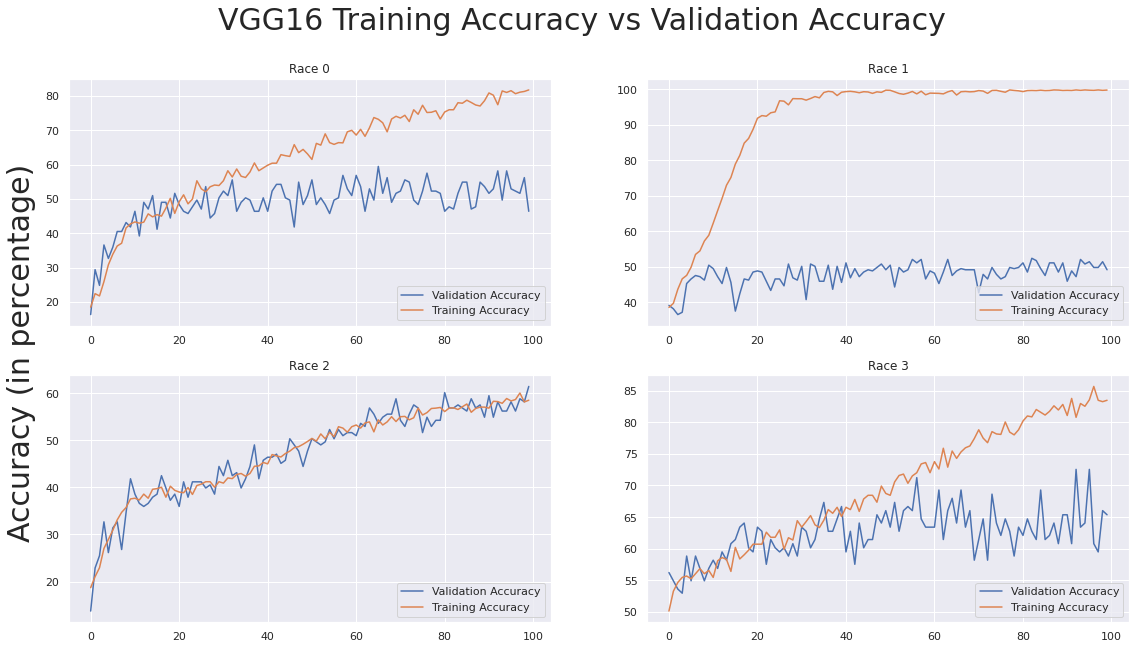

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(2,2, figsize=(19,10))
fig.suptitle('VGG16 Training Accuracy vs Validation Accuracy', fontsize=30)
# fig, axs = plt.subplots(2,2, figsize=(19,10),sharex=True, sharey=True)
# fig.text(0.51, 0.08, 'VGG16 Training Accuracy vs Validation Accuracy', ha='center',fontsize=15 )
fig.text(0.08, 0.5, 'Accuracy (in percentage)', va='center', rotation='vertical',fontsize=30)

axs[0, 0].plot(model_vgg_1_list_val_acc, label="Validation Accuracy")
axs[0, 0].plot(model_vgg_1_list_train_acc, label="Training Accuracy")
axs[0, 0].set_title('Race 0')
axs[0,0].legend(loc='lower right')

axs[0, 1].plot(model_vgg_2_list_val_acc, label="Validation Accuracy")
axs[0, 1].plot(model_vgg_2_list_train_acc, label="Training Accuracy")
axs[0, 1].set_title('Race 1')
axs[0,1].legend(loc='lower right')

axs[1, 0].plot(model_vgg_3_list_val_acc, label="Validation Accuracy")
axs[1, 0].plot(model_vgg_3_list_train_acc, label="Training Accuracy")
axs[1, 0].set_title('Race 2')
axs[1,0].legend(loc='lower right')

axs[1, 1].plot(model_vgg_4_list_val_acc, label="Validation Accuracy")
axs[1, 1].plot(model_vgg_4_list_train_acc, label="Training Accuracy")
axs[1, 1].set_title('Race 3')
axs[1,1].legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect//Visualization_plot/VGG_AccuracyPlot.png')
plt.show()
# print(ax_list)

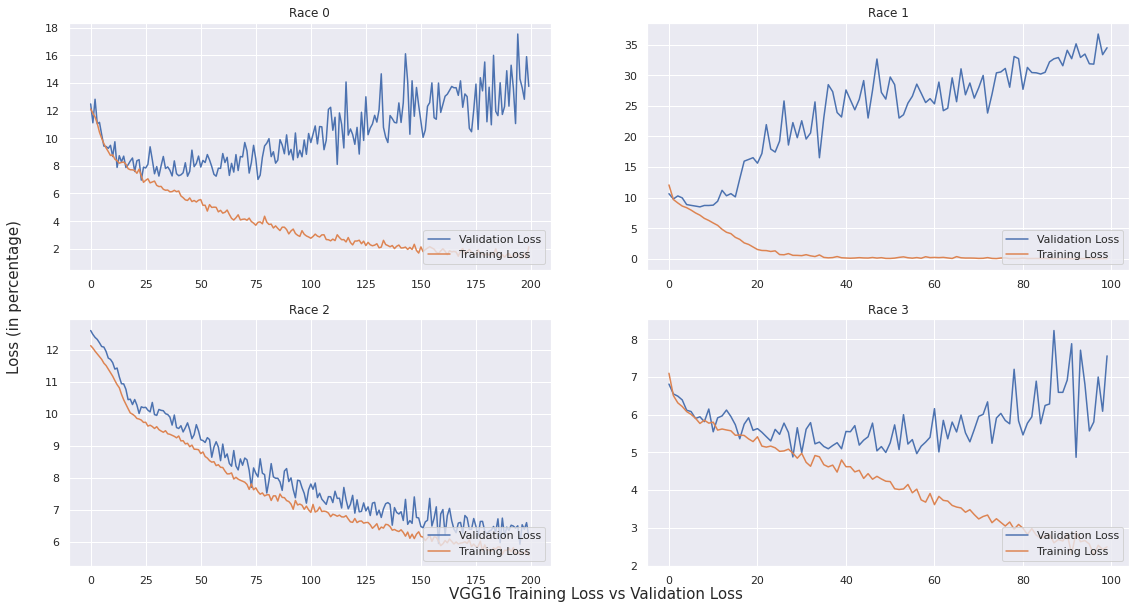

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(2,2, figsize=(19,10))
# fig, axs = plt.subplots(2,2, figsize=(19,10),sharex=True, sharey=True)
fig.text(0.51, 0.08, 'VGG16 Training Loss vs Validation Loss', ha='center',fontsize=15 )
fig.text(0.08, 0.5, 'Loss (in percentage)', va='center', rotation='vertical',fontsize=15)

axs[0, 0].plot(model_vgg_1_list_val_loss, label="Validation Loss")
axs[0, 0].plot(model_vgg_1_list_train_loss, label="Training Loss")
axs[0, 0].set_title('Race 0')
axs[0,0].legend(loc='lower right')

axs[0, 1].plot(model_vgg_2_list_val_loss, label="Validation Loss")
axs[0, 1].plot(model_vgg_2_list_train_loss, label="Training Loss")
axs[0, 1].set_title('Race 1')
axs[0,1].legend(loc='lower right')

axs[1, 0].plot(model_vgg_3_list_val_loss, label="Validation Loss")
axs[1, 0].plot(model_vgg_3_list_train_loss, label="Training Loss")
axs[1, 0].set_title('Race 2')
axs[1,0].legend(loc='lower right')

axs[1, 1].plot(model_vgg_4_list_val_loss, label="Validation Loss")
axs[1, 1].plot(model_vgg_4_list_train_loss, label="Training Loss")
axs[1, 1].set_title('Race 3')
axs[1,1].legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect//Visualization_plot/VGG_LossPlot.png')
plt.show()

# Restnet

In [ ]:
path_rest='/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_0_checkpts/resnet101_race_0_age_best.pt'
model_rest_1 = torch.load(path_rest,map_location=torch.device('cpu'))
path2_rest="/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_1_checkpts/resnet101_race_1_age_best_harry.pt"
model_rest_2 = torch.load(path2_rest,map_location=torch.device('cpu'))
path3="/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_2_checkpts/VGG16_race_2_age_best.pt"
model_rest_3=torch.load(path3,map_location=torch.device('cpu'))
path4_rest="/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_3_checkpts/resnet101_race_3_age_best.pt"
model_rest_4 = torch.load(path4_rest,map_location=torch.device('cpu'))

In [ ]:
model_rest_1_c=model_rest_1.copy()
model_rest_2_c=model_rest_2.copy()
model_rest_3_c=model_rest_3.copy()
model_rest_4_c=model_rest_4.copy()

In [ ]:
model_rest_1_list_val_acc,model_rest_1_list_train_acc,model_rest_1_list_val_loss,model_rest_1_list_train_loss=getAcc(model_rest_1_c)
model_rest_2_list_val_acc,model_rest_2_list_train_acc,model_rest_2_list_val_loss,model_rest_2_list_train_loss=getAcc(model_rest_2_c)
model_rest_3_list_val_acc,model_rest_3_list_train_acc,model_rest_3_list_val_loss,model_rest_3_list_train_loss=getAcc(model_rest_3_c)
model_rest_4_list_val_acc,model_rest_4_list_train_acc,model_rest_4_list_val_loss,model_rest_4_list_train_loss=getAcc(model_rest_4_c)

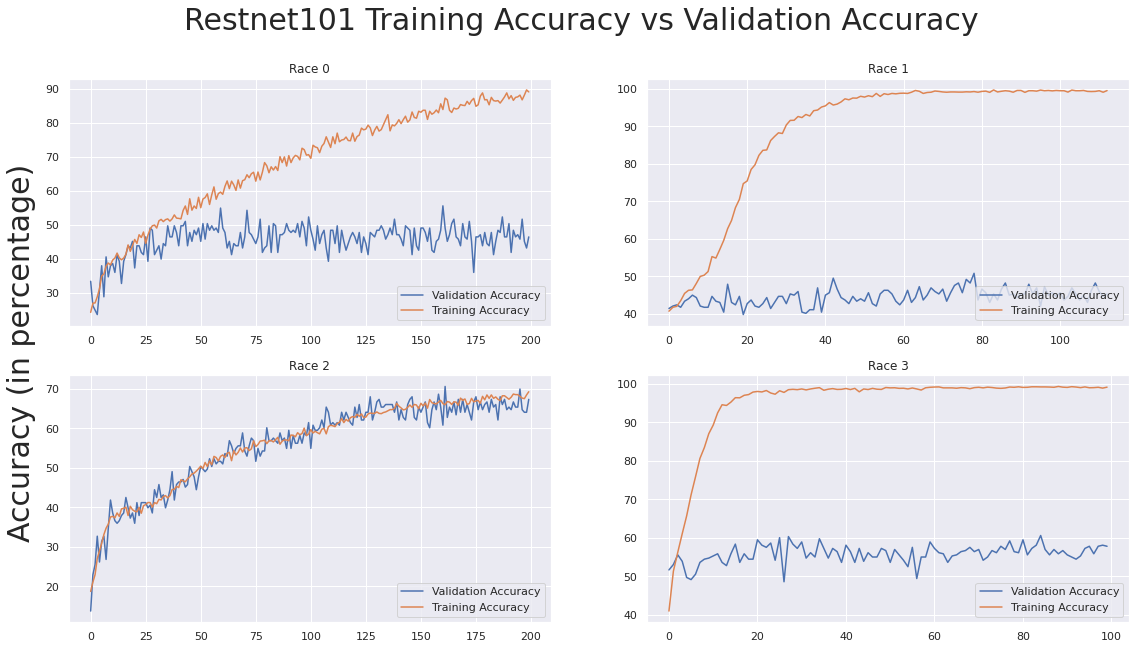

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(2,2, figsize=(19,10))
# fig, axs = plt.subplots(2,2, figsize=(19,10),sharex=True, sharey=True)
fig.suptitle('Restnet101 Training Accuracy vs Validation Accuracy', fontsize=30)

fig.text(0.08, 0.5, 'Accuracy (in percentage)', va='center', rotation='vertical',fontsize=30)

axs[0, 0].plot(model_rest_1_list_val_acc, label="Validation Accuracy")
axs[0, 0].plot(model_rest_1_list_train_acc, label="Training Accuracy")
axs[0, 0].set_title('Race 0')
axs[0,0].legend(loc='lower right')

axs[0, 1].plot(model_rest_2_list_val_acc, label="Validation Accuracy")
axs[0, 1].plot(model_rest_2_list_train_acc, label="Training Accuracy")
axs[0, 1].set_title('Race 1')
axs[0,1].legend(loc='lower right')

axs[1, 0].plot(model_rest_3_list_val_acc, label="Validation Accuracy")
axs[1, 0].plot(model_rest_3_list_train_acc, label="Training Accuracy")
axs[1, 0].set_title('Race 2')
axs[1,0].legend(loc='lower right')

axs[1, 1].plot(model_rest_4_list_val_acc, label="Validation Accuracy")
axs[1, 1].plot(model_rest_4_list_train_acc, label="Training Accuracy")
axs[1, 1].set_title('Race 3')
axs[1,1].legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/Visualization_plot/Restnet_AccuracyPlot.png')
plt.show()

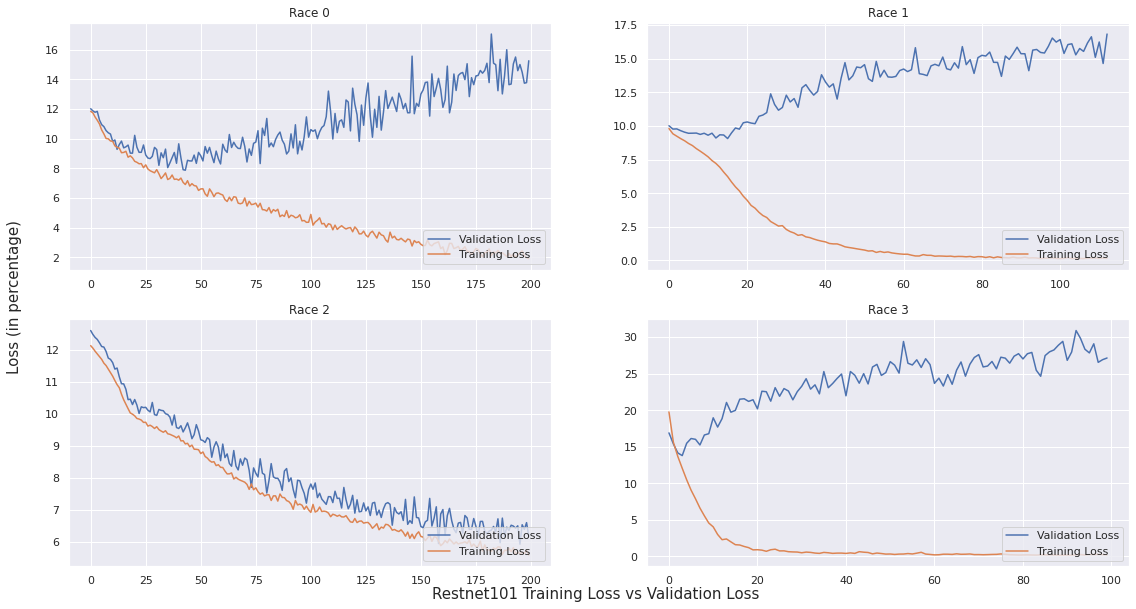

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(2,2, figsize=(19,10))
# fig, axs = plt.subplots(2,2, figsize=(19,10),sharex=True, sharey=True)
fig.text(0.51, 0.08, 'Restnet101 Training Loss vs Validation Loss', ha='center',fontsize=15 )
fig.text(0.08, 0.5, 'Loss (in percentage)', va='center', rotation='vertical',fontsize=15)

axs[0, 0].plot(model_rest_1_list_val_loss, label="Validation Loss")
axs[0, 0].plot(model_rest_1_list_train_loss, label="Training Loss")
axs[0, 0].set_title('Race 0')
axs[0,0].legend(loc='lower right')

axs[0, 1].plot(model_rest_2_list_val_loss, label="Validation Loss")
axs[0, 1].plot(model_rest_2_list_train_loss, label="Training Loss")
axs[0, 1].set_title('Race 1')
axs[0,1].legend(loc='lower right')

axs[1, 0].plot(model_rest_3_list_val_loss, label="Validation Loss")
axs[1, 0].plot(model_rest_3_list_train_loss, label="Training Loss")
axs[1, 0].set_title('Race 2')
axs[1,0].legend(loc='lower right')

axs[1, 1].plot(model_rest_4_list_val_loss, label="Validation Loss")
axs[1, 1].plot(model_rest_4_list_train_loss, label="Training Loss")
axs[1, 1].set_title('Race 3')
axs[1,1].legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect//Visualization_plot/Restnet_LossPlot.png')
plt.show()

#Full Data

In [9]:
path_full_vgg='/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_fulldataset_checkpts/VGG16_race_fulldataset_age_best.pt'
model_vgg_full = torch.load(path_full_vgg,map_location=torch.device('cpu'))

path_full_rest='/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/race_fulldataset_checkpts/resnet101_race_fulldataset_age_best.pt'
model_rest_full = torch.load(path_full_rest,map_location=torch.device('cpu'))

In [10]:
model_vgg_full_c=model_vgg_full.copy()
model_rest_full_c=model_rest_full.copy()


In [13]:
model_vgg_full_list_val_acc,model_vgg_full_list_train_acc,model_vgg_full_list_val_loss,model_vgg_full_list_train_loss=getAcc(model_vgg_full_c)
model_rest_full_list_val_acc,model_rest_full_list_train_acc,model_rest_full_list_val_loss,model_rest_full_list_train_loss=getAcc(model_rest_full_c)

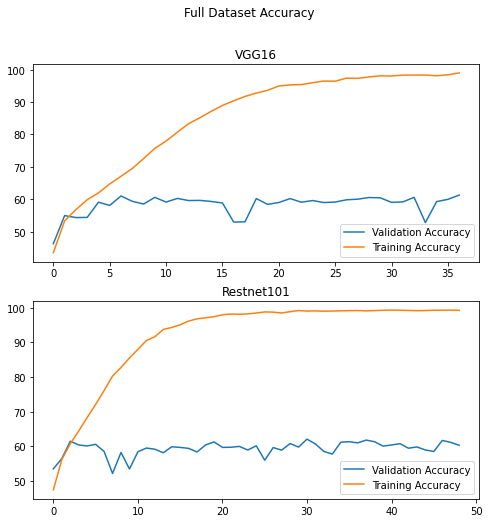

In [14]:
fig, axs = plt.subplots(2, figsize=(8,8))
fig.suptitle('Full Dataset Accuracy')
axs[0].plot(model_vgg_full_list_val_acc, label= "Validation Accuracy")
axs[0].plot(model_vgg_full_list_train_acc, label="Training Accuracy")
axs[0].set_title('VGG16')
axs[0].legend(loc='lower right')

axs[1].plot(model_rest_full_list_val_acc, label= "Validation Accuracy")
axs[1].plot(model_rest_full_list_train_acc, label="Training Accuracy")
axs[1].set_title('Restnet101')
axs[1].legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect//Visualization_plot/full_accuracyPlot.png')
plt.show()

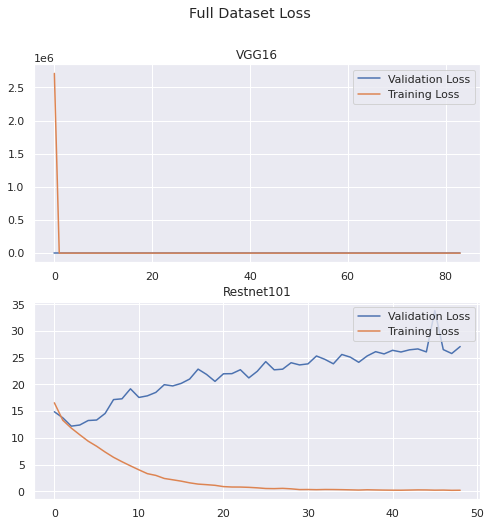

In [ ]:
fig, axs = plt.subplots(2, figsize=(8,8))
fig.suptitle('Full Dataset Loss')
axs[0].plot(model_vgg_full_list_val_loss, label= "Validation Loss")
axs[0].plot(model_vgg_full_list_train_loss, label="Training Loss")
axs[0].set_title('VGG16')
axs[0].legend(loc='upper right')

axs[1].plot(model_rest_full_list_val_loss, label= "Validation Loss")
axs[1].plot(model_rest_full_list_train_loss, label="Training Loss")
axs[1].set_title('Restnet101')
axs[1].legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect//Visualization_plot/full_lossPlot.png')
plt.show()

# Data Description


In [ ]:
%cd "/content/drive/MyDrive/Final"

/content/drive/.shortcut-targets-by-id/1ujc0rEwHZPLX-PmA8l7W_lrmuFS-3EZr/Final


In [ ]:
import os
from os.path import isfile, join

crop_path = "./Dataset/UTKFace/"

crop_list = [f for f in os.listdir(crop_path) if isfile(join(crop_path,f)) and f.endswith(".jpg")]

In [ ]:
import pandas as pd 

age_list = []
gender_list = []
race_list = []

for crop_img_name in crop_list:
  
  img_name = crop_img_name.split("_")

  age_list.append(int(img_name[0]))
  gender_list.append(img_name[1])
  race_list.append(img_name[2])

df = pd.DataFrame({
    "img":crop_list,
    "age":age_list,
    "gender":gender_list,
    "race":race_list
})

df

,img,age,gender,race
0,56_0_3_20170119180916188.jpg.chip.jpg,56,0,3
1,56_0_3_20170119183551541.jpg.chip.jpg,56,0,3
2,56_0_2_20170119180737540.jpg.chip.jpg,56,0,2
3,56_0_3_20170119174930466.jpg.chip.jpg,56,0,3
4,56_0_3_20170119180731484.jpg.chip.jpg,56,0,3
...,...,...,...,...
23703,1_0_2_20161219202914180.jpg.chip.jpg,1,0,2
23704,1_1_0_20161219202919508.jpg.chip.jpg,1,1,0
23705,2_1_2_20161219202825380.jpg.chip.jpg,2,1,2
23706,5_0_2_20161219202809316.jpg.chip.jpg,5,0,2


In [ ]:
# Find the img location
outliers = []
for i,race in enumerate(df["race"]):
  if(race == "20170116174525125.jpg.chip.jpg" or race == "20170109150557335.jpg.chip.jpg" or race == "20170109142408075.jpg.chip.jpg"):
    print(i)
    outliers.append(i)

3374
15800
15805


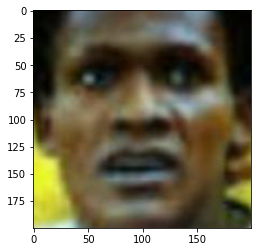

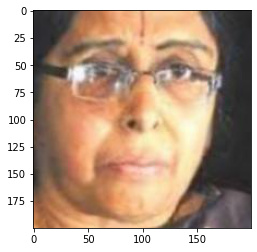

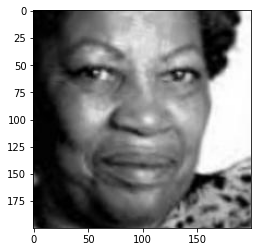

In [ ]:
# show the image for manual label
import matplotlib.pyplot as plt
import numpy as np
for outlier in outliers:
  img = plt.imread(join(crop_path,df["img"][outlier]))

  plt.imshow(img)
  plt.show()

In [ ]:
# label the images 
df["race"][outliers[0]] = "1"
df["race"][outliers[1]] = "3"
df["race"][outliers[2]] = "1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
race_count=df['race'].value_counts().tolist()

In [ ]:
print(type(race_count))

<class 'list'>


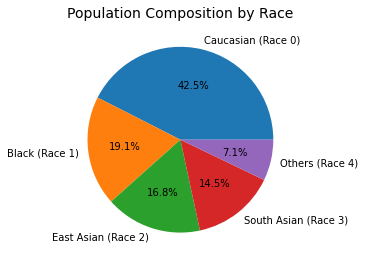

In [ ]:
# plt.figure(figsize=(5,5))
labels = ['Caucasian (Race 0)', 'Black (Race 1)', 'East Asian (Race 2)', 'South Asian (Race 3)', 'Others (Race 4)']
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(race_count,  labels=labels, autopct='%1.1f%%')
# df['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Population Composition by Race", fontdict={'fontsize': 14})
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/Visualization_plot/whole_race_pie.png')

In [ ]:
# race_num = "0"

# race_num_list = df.index[df['race'] == race_num].tolist()

# df_race = df.iloc[race_num_list]
# df_20_50_race = df_race

In [ ]:

def AgeRange(race_num):
  race_num_list = df.index[df['race'] == race_num].tolist()

  df_race = df.iloc[race_num_list]
  df_20_50_race = df_race
  age_range_list = []
  for age in df_20_50_race["age"]:
    if(int(age)>=0 and int(age) < 10):
        # set 0-10 as class 0
        age_range_list.append(0)
    elif(int(age)>=10 and int(age) < 20):
        # set 10-20 as class 1
        age_range_list.append(1)
    elif(int(age)>=20 and int(age) < 30):
        # set 20-30 as class 2
        age_range_list.append(2)
    elif(int(age)>=30 and int(age) < 40):
        # set 30-40 as class 3
        age_range_list.append(3)
    elif(int(age)>=40 and int(age) < 50):
        # set 40-50 as class 4
        age_range_list.append(4)
    elif(int(age)>=50 and int(age) < 60):
        # set 50-60 as class 5
        age_range_list.append(5)
    elif(int(age) >= 60):
        # set 60> as class 5
        age_range_list.append(6)

  values, counts = np.unique(age_range_list, return_counts=True)
  return (values, counts)

In [ ]:
values0, counts0=AgeRange("0")
values1, counts1=AgeRange("1")
values2, counts2=AgeRange("2")
values3, counts3=AgeRange("3")
print(values0)
print(counts0)

[0 1 2 3 4 5 6]
[1106  943 1986 1749 1115 1368 1811]


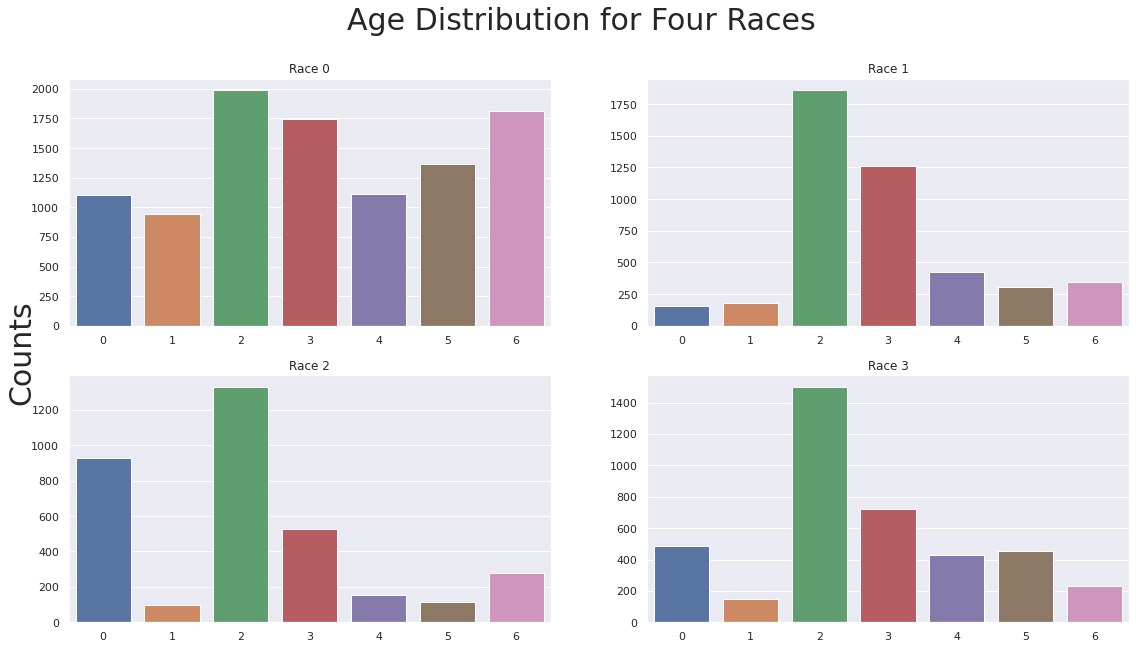

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme()
fig, ax = plt.subplots(2,2, figsize=(19,10))

fig.suptitle('Age Distribution for Four Races', fontsize=30)
# fig.text(0.51, 0.08, 'Age Distribution for Four Races', ha='center',fontsize=15 )
fig.text(0.08, 0.5, 'Counts', va='center', rotation='vertical',fontsize=30)

sns.barplot(ax=ax[0,0],x=values0, y=counts0)
ax[0, 0].set_title('Race 0')
sns.barplot(ax=ax[0,1],x=values1, y=counts1)
ax[0, 1].set_title('Race 1')
sns.barplot(ax=ax[1,0],x=values2, y=counts2)
ax[1, 0].set_title('Race 2')
sns.barplot(ax=ax[1,1],x=values3, y=counts3)
ax[1, 1].set_title('Race 3')


plt.savefig('/content/drive/MyDrive/Final/New_Final_Cross_Race_Effect/Visualization_plot/AgeGroup_Race.png')
plt.show()